# Imports and Setups

In [1]:
import os

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd

pd.set_option('max_columns', None)

MODEL_SAVE_AS = 'latest'
MODEL_SAVE_DIR = 'models'

LOAD_MODEL = True
SAVE_MODEL = True

model_path = os.path.join(MODEL_SAVE_DIR, MODEL_SAVE_AS)

# Functions

In [2]:
def plot_sample_by_index(x, y, index: int):
    fig = plt.figure(figsize=(6, 4))
    plt.imshow(x[index], cmap='gray', interpolation='none')
    plt.title(f'Sample: {index}, Digit {y[index]}')
    plt.xticks([])
    plt.yticks([])
    
def plot_samples_grid(x, start_index: int = 0, show_digit: int = None):
    get_digit = (lambda i: show_digit) if show_digit else (lambda i: i + start_index)
    fig = plt.figure(figsize=(8, 6))
    j = start_index
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.tight_layout()
        digit = get_digit(i)
        while y_train[j] != digit:
            j += 1
        plt.imshow(x[j], cmap='gray', interpolation='none')
        plt.title(f'Sample: {j}\nDigit {digit}')
        plt.xticks([])
        plt.yticks([])
        j += 1

# Data Prep

In [3]:
# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Download (or load) the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('Train shape (x | y):', x_train.shape, '|', y_train.shape)
print('Test shape  (x | y):', x_test.shape, '|', y_test.shape)

Train shape (x | y): (60000, 28, 28) | (60000,)
Test shape  (x | y): (10000, 28, 28) | (10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


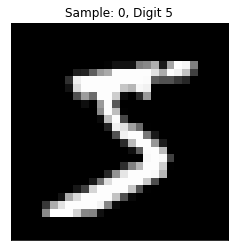

In [7]:
plot_sample_by_index(x=x_train, y=y_train, index=0)

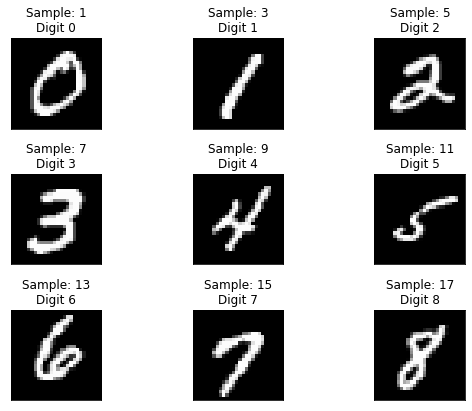

In [8]:
plot_samples_grid(x=x_train)

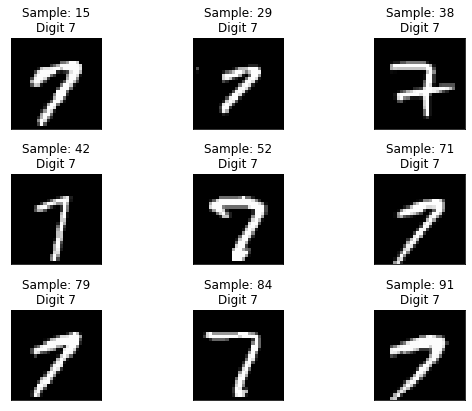

In [9]:
plot_samples_grid(x=x_train, show_digit=7)

In [10]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.070588,0.070588,0.070588,0.494118,0.533333,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.984314,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,0.992157,0.992157,0.992157,0.992157,0.776471,0.713726,0.968627,0.945098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313726,0.611765,0.419608,0.992157,0.992157,0.803922,0.043137,0.000000,0.168627,0.603922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


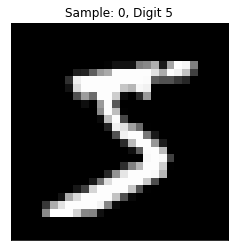

In [11]:
plot_sample_by_index(x=x_train, y=y_train, index=0)

# RBG Channels and Image Dimensions

## RGB Explained

If we took look at our computer monitor’s display with a magnifying lens we would see that it consists of a very large number of triplets of red, green and blue dots.

Images on the computer display are formed when the monitor precisely varies the brightness of the red, green and blue elements in each triplet. Because the dots are close together the human eye will fuse the three red, green and blue dots of varying brightness into a single dot that appears to be the color combination of the three levels of red, green and blue color.

The Red, Green and Blue elements of images are refered to as "R", "G" and "B" (aka, RGB).

![RBG Images](images/rbg_explained.gif "RBG Images")

## Model Input Shape

When building our dataset, we need to take into consideration not only the number of samples and number of pixels per sample, but also the values of each color channel in the samples.

<img src="images/cat_rgb_channels.jpeg" alt="RGB Channels Example" width="400"/>


Hence, before giving our input data to the model for either training or prediction, we must ensure that it has the correct dimensions. These are:
1. The number instances in the dataset
2. The width of the image in number of pixels 
3. The height of the image in number of pixels 
4. The number of color channels

Since out images are in gray scale, they have only one channel.

In [12]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## One Hot encoding

### What is One Hot Encoding?
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

### Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’

In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.

In [13]:
print('10 first train targets:', y_train[:10])
print('10 first test targets: ', y_test[:10])

10 first train targets: [5 0 4 1 9 2 1 3 1 4]
10 first test targets:  [7 2 1 0 4 1 4 9 5 9]


In [14]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
pd.DataFrame(y_train).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Build the model

<!-- ![RBG Images](images/mnist_convnet_architecture.png "MNIST Architecture") -->
<img src="images/mnist_convnet_architecture.png" alt="MNIST Architecture" width="1000"/>

In [16]:
MODEL_LOADED = False
if LOAD_MODEL and os.path.exists(model_path):
    print(f'Loading the model from {model_path}')
    model = keras.models.load_model(model_path)
    MODEL_LOADED = True
else:
    print(f'Creating new model')
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

model.summary()

Loading the model from models/latest
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)      

# Train the model

In [17]:
if MODEL_LOADED:
    print('Skipping training for model that has been loaded.')
else:
    # Training parameters
    batch_size = 128
    epochs = 15

    # Train model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Skipping training for model that has been loaded.


# Save the model

In [18]:
if not MODEL_LOADED and SAVE_MODEL:
    os.makedirs(MODEL_SAVE_DIR, exist_ok=True)
    model.save(model_path)

# Evaluate the Model

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:    ", score[0])
print("Test accuracy:", score[1])

Test loss:     0.02265092171728611
Test accuracy: 0.9925000071525574


# Make predictions

In [20]:
predictions = model.predict(x_test)
x_test_display = np.squeeze(x_test)
y_test_display = np.squeeze(y_test)

Model Prediction: [9.36843485e-12 8.02144040e-09 7.65950775e-11 8.97275976e-10
 9.99889135e-01 1.73276415e-09 6.05884898e-10 4.11070374e-07
 2.34530859e-07 1.10164256e-04]

Prediction argmax: 4 



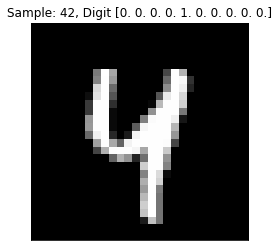

In [21]:
index = 42
print('Model Prediction:', predictions[index])
print('\nPrediction argmax:', np.argmax(predictions[index]), '\n')
plot_sample_by_index(x=x_test_display, y=y_test_display, index=index)